#Homework 2

This homework will give you some practice with using and interpreting the Discrete Fourier Transform, and with using correlation to identify signals. In each question you will process some files that are stored on Google Drive and automatically downloaded to this notebook.

In [5]:
# HW2
%matplotlib inline
import numpy as np
import pandas as pd
import io
from google.colab import files
import matplotlib.pyplot as plt
np.set_printoptions(precision=2)

In [6]:
# Download data from https://drive.google.com/file/d/1_epCEjB542r4cnjz1HwxcSt3UlB9GutP/view?usp=sharing
!rm -r Signals 2>/dev/null
!wget --no-check-certificate 'https://docs.google.com/uc?export=download&id=1_epCEjB542r4cnjz1HwxcSt3UlB9GutP' -O Signals.zip
!unzip Signals.zip

--2024-04-22 23:42:27--  https://docs.google.com/uc?export=download&id=1_epCEjB542r4cnjz1HwxcSt3UlB9GutP
Resolving docs.google.com (docs.google.com)... 74.125.26.102, 74.125.26.139, 74.125.26.113, ...
Connecting to docs.google.com (docs.google.com)|74.125.26.102|:443... connected.
HTTP request sent, awaiting response... 303 See Other
Location: https://drive.usercontent.google.com/download?id=1_epCEjB542r4cnjz1HwxcSt3UlB9GutP&export=download [following]
--2024-04-22 23:42:27--  https://drive.usercontent.google.com/download?id=1_epCEjB542r4cnjz1HwxcSt3UlB9GutP&export=download
Resolving drive.usercontent.google.com (drive.usercontent.google.com)... 173.194.215.132, 2607:f8b0:400c:c0c::84
Connecting to drive.usercontent.google.com (drive.usercontent.google.com)|173.194.215.132|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 30550 (30K) [application/octet-stream]
Saving to: ‘Signals.zip’

Signals.zip         100%[===================>]  29.83K  --.-KB/s    in 0.001s

##Q1 Using and interpreting the Fourier Transform

Q1 deals with the file "mysterysignal200sps.csv", which is stored in the `loadeddata` variable.

***1a [4 points]*** The signal is sampled at 200 samples per second. Plot the time domain signal, with the horizontal axis properly labeled with actual times (in seconds) at which the samples occured.

***1b [2 points]*** Given that the signal was sampled at 200 samples per second, what is the Nyquist frequency, i.e. the highest frequency that will be accurately captured in the signal?

***1c [6 points]*** Plot the magnitude of the Discrete Fourier transform of this signal, using Numpy's fft routine. Make sure that the horizontal axis is properly labeled with actual frequencies. Remember to use fftshift or the horizontal axis won't be easily interpreted. Also remember that the frequency scale is determined by the Nyquist frequency.

***1d [4 points]*** The signal contains two main frequencies, which should be visible in the Fourier Transform plot. What are the two frequencies? You can just read the value off the plot... You don't need to programmatically find the peaks.

***1e [4 points]*** Why does the DFT plot have 4 peaks instead of just 2?



In [7]:
dfloaded = pd.read_csv('Signals/mysterysignal200sps.csv',sep=',')
loadeddata = dfloaded.iloc[:,1]

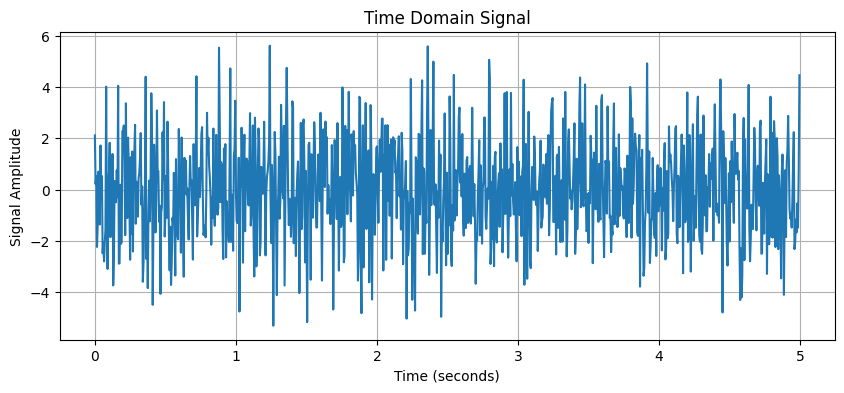

In [8]:
#1a
N = len(loadeddata)
sps = 200 # samples per second... the sampling frequency...aka f_s in the notes
TMAX = (N - 1)/(sps)  # fill this in for your solution
t = np.linspace(0, TMAX, N)  # fill this in for your solution

plt.figure(figsize=(10, 4))
plt.plot(t, loadeddata)
plt.title("Time Domain Signal")
plt.xlabel("Time (seconds)")
plt.ylabel("Signal Amplitude")
plt.grid(True)
plt.show()

In [18]:
#1b
nyquist = sps / 2
print("The Nyquist frequency will be " + str(nyquist) + "Hz")

The Nyquist frequency will be 100.0Hz


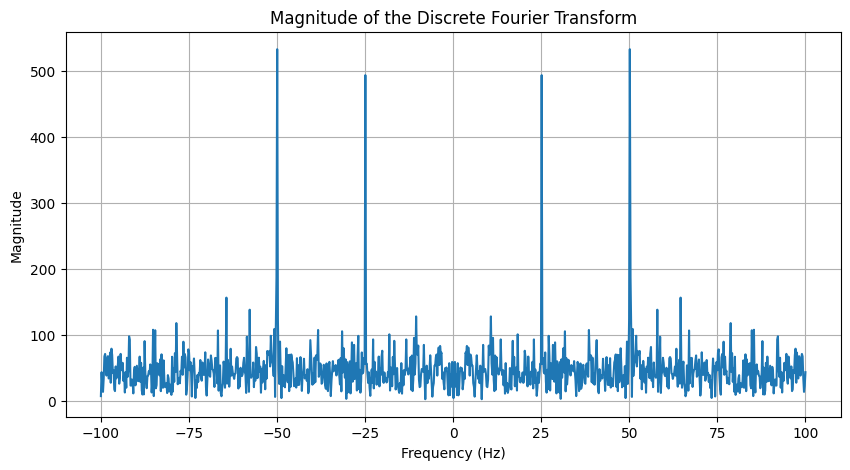

In [21]:
#1c
# Compute the Discrete Fourier Transform (DFT) of the signal
fft_signal = np.fft.fft(loadeddata)
fft_shifted = np.fft.fftshift(fft_signal)


magnitude = np.abs(fft_shifted)
freqs = np.linspace(-(nyquist), nyquist, N)

# Plot the magnitude spectrum
plt.figure(figsize=(10, 5))
plt.plot(freqs, magnitude)
plt.title('Magnitude of the Discrete Fourier Transform')
plt.xlabel('Frequency (Hz)')
plt.ylabel('Magnitude')
plt.grid(True)
plt.show()

#1d
  #Around 50 and 25

In [ ]:
#1e
  #When you calculate the DFT of a real-valued signal, the result has 4 values
  #because the complex exponentials used in the DFT have conjugate symmetry.

##Q2 Catching Crooks with Correlation

The fingerprint in the file "fingerprinttest.csv" was discovered at the scene of a crime. You also have a database of 4 fingerprints from known criminals, with filenames "fingerprint1.csv" etc. The code snippets below load the various fingerprints into variables so that you can perform computations on them.

***2a [6 points]*** Plot all of the fingerprints (don't worry about putting anything special on the horizontal axis... Just the default of sample numbers if fine).

***2b [4 points]*** Can you tell by examining the plots which fingerprint from the database matches the fingerprint from the crime scene? Why/why not? (I am just looking for an additional sentence of commentary in addition to yes/no.)

***2c [8 points]*** Compute the correlation of the fingerprint taken from the scene of the crime ("fingerprinttest") with each of the fingerprints in the database.

***2d [2 points]*** Based on these correlation results, which of the 4 people in the database is the most likely match with the fingerprint from the crime scene?

In [24]:
# Read in fingerprint file test (suspect)
dfldt = pd.read_csv('Signals/fingerprinttest.csv',sep=',')
fingerprinttest = dfldt.iloc[:,1] # You will use this variable (fingerprinttest) in your answers

In [25]:
# Read in fingerprints 1-4
dfld1 = pd.read_csv('Signals/fingerprint1.csv',sep=',')
fingerprint1 = dfld1.iloc[:,1] # You will use this variable in your answers

dfld2 = pd.read_csv('Signals/fingerprint2.csv',sep=',')
fingerprint2 = dfld2.iloc[:,1] # You will use this variable in your answers

dfld3 = pd.read_csv('Signals/fingerprint3.csv',sep=',')
fingerprint3 = dfld3.iloc[:,1] # You will use this variable in your answers

dfld4 = pd.read_csv('Signals/fingerprint4.csv',sep=',')
fingerprint4 = dfld4.iloc[:,1] # You will use this variable in your answers

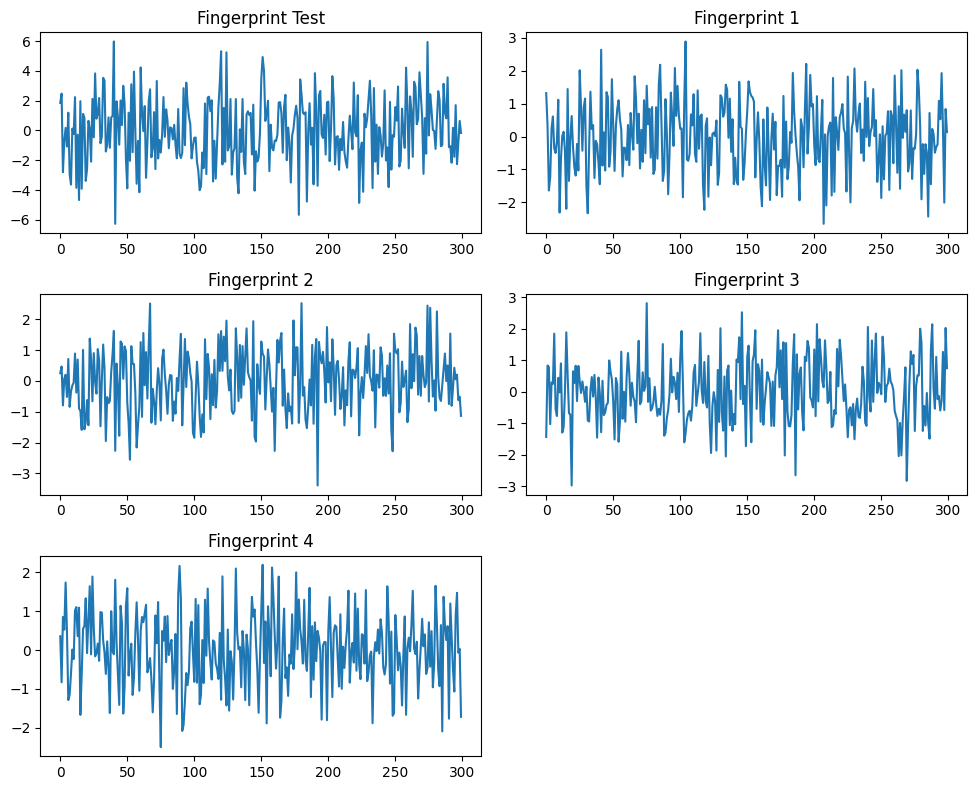

In [26]:
#2a
# Plot each fingerprint
plt.figure(figsize=(10, 8))

plt.subplot(3, 2, 1)
plt.plot(fingerprinttest)
plt.title('Fingerprint Test')

plt.subplot(3, 2, 2)
plt.plot(fingerprint1)
plt.title('Fingerprint 1')

plt.subplot(3, 2, 3)
plt.plot(fingerprint2)
plt.title('Fingerprint 2')

plt.subplot(3, 2, 4)
plt.plot(fingerprint3)
plt.title('Fingerprint 3')

plt.subplot(3, 2, 5)
plt.plot(fingerprint4)
plt.title('Fingerprint 4')

plt.tight_layout()
plt.show()


In [27]:
#2b
  # No, as there is a lot of noise in the data and you can't easily tell which one correlates with the test
  # just by looking at the plots.

In [31]:
#2c
def normalize(fingerprint):
  return fingerprint/np.sqrt(np.dot(fingerprint,fingerprint))

fingerarr = [normalize(fingerprint1), normalize(fingerprint2), normalize(fingerprint3), normalize(fingerprint4)]

maxcorr = 0
for i, finger in enumerate(fingerarr):
  corr = np.abs(np.dot(normalize(fingerprinttest), finger))
  if corr > maxcorr:
    maxcorr = corr
    maxfingern = finger
    maxfingeri = i + 1

In [30]:
#2d
print("The person in the database which is the most likely match with the fingerprint from the crime scene is person number " + str(maxfingeri))

The person in the database which is the most likely match with the fingerprint from the crime scene is person number 2


##Q3 Fourier Transform properties: scale and shift
In this question you will experimentally verify the frequency shift property of the Fourier transform. As a reminder, this is
$f(t) e^{2 \pi j k_0 t} \Longleftrightarrow F(k-k_0)$. In words, you will test the claim that if you take a time domain signal $f(t)$ and multiply it by a complex exponential with frequency $k_0$, it shifts the Fourier Transform horizontally by $k_0$.

For the time domain signal, we will use a $sinc$ function, ie $\frac{sin(t)}{t}$

In this question we will use the ```t```, ```freqs```, and `TMAX` variables defined in earlier cells from Q1.

Below is the time domain $sinc$ function you will be using, in the variable ```asignal```. In the example below, the frequency of the sinc is 3Hz.

<Figure size 640x480 with 0 Axes>

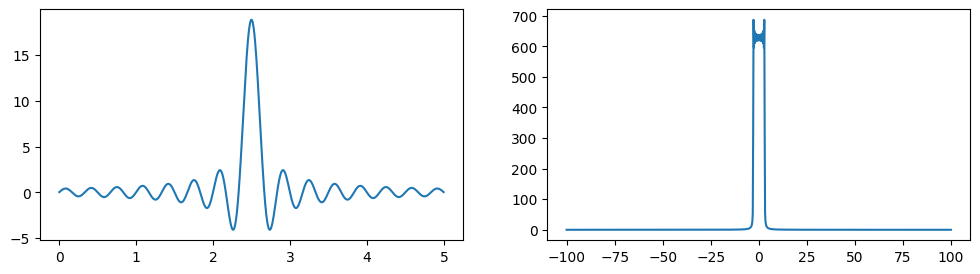

In [32]:
# Defining the sinc in asignal
f0 = 3
TMID = TMAX/2.0
asignal = np.sin(2*np.pi*f0*(t-TMID))/(t-TMID)
plt.figure()
plt.figure(figsize=(12,3));
plt.subplot(1,2,1)
plt.plot(t,asignal);

ASIGNAL = np.fft.fft(asignal)
plt.subplot(1,2,2);
plt.plot(freqs,np.abs(np.fft.fftshift(ASIGNAL)));

***3a [4 points] Scale property***
Copy the code above for 3 Hz sinc into a new cell below this.

- 3a1: Change the frequency to 20Hz and generate the time and frequency plots.
- 3a2: Then change the frequency to 6 Hz. (So for question 3a you will generate 4 plots total: time and frequency for the 20Hz and 6Hz sincs.)

***3b [4 points]*** Describe the relationship between the scale of the time domain and of the frequency domain, as illustrated in the plots from 3a.

<Figure size 640x480 with 0 Axes>

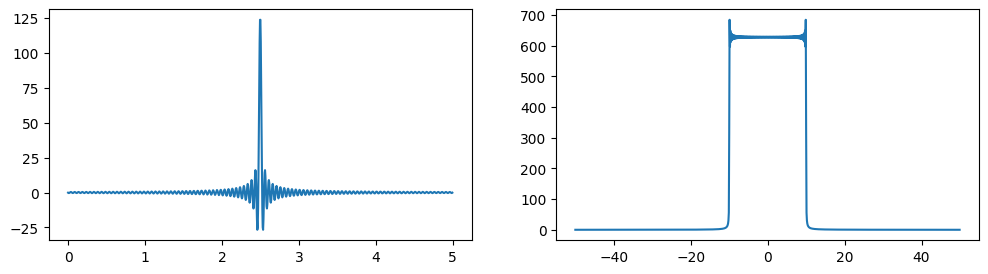

<Figure size 640x480 with 0 Axes>

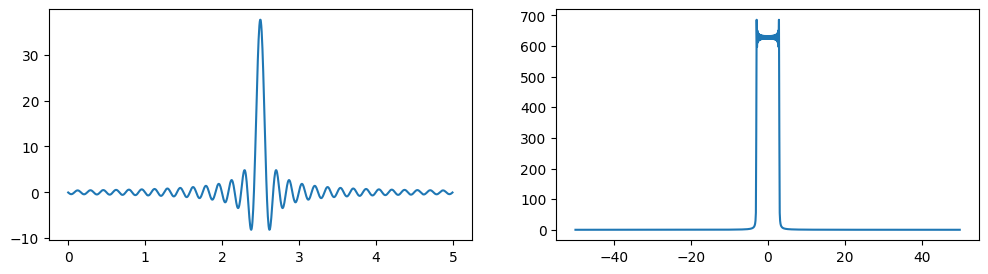

In [ ]:
#3a1
f0 = 20
TMID = TMAX/2.0
asignal = np.sin(2*np.pi*f0*(t-TMID))/(t-TMID)
plt.figure()
plt.figure(figsize=(12,3));
plt.subplot(1,2,1)
plt.plot(t,asignal);

ASIGNAL = np.fft.fft(asignal)
plt.subplot(1,2,2);
plt.plot(freqs,np.abs(np.fft.fftshift(ASIGNAL)));

#3a2
f0 = 6
TMID = TMAX/2.0
asignal = np.sin(2*np.pi*f0*(t-TMID))/(t-TMID)
plt.figure()
plt.figure(figsize=(12,3));
plt.subplot(1,2,1)
plt.plot(t,asignal);

ASIGNAL = np.fft.fft(asignal)
plt.subplot(1,2,2);
plt.plot(freqs,np.abs(np.fft.fftshift(ASIGNAL)));
#3b
  # When time is localized, the freuqency is spread out. The vice versa is also true for the other graph,
  # and this follows from Heisenberg's Uncertainty Principle

***3c [2 points] Shift property***
Create a variable ```carrier1``` which is a complex exponential function of ```t``` with frequency 15 Hz.

***3d [2 points] Shift property***
Plot ```t``` vs the real part of ```carrier1```.

***3e [2 points] Shift property***
Create a new variable ```modulated1``` which is the product of ```asignal``` and ```carrier1```. Plot ```t``` vs the real part of ```modulated1```.

***3f [2 points] Shift property***
Compute the FFT of ```modulated1``` and put it in a variable called ```MODULATED1```.

***3g [2 points] Shift property***
Plot ```freqs``` vs the magnitude of ```MODULATED1```. Remember to use fftshift when you make the plot.

***3h [4 points] Shift property***
Create a ```carrier2``` similar to `carrier1` but with frequency -10 Hz (note the negative sign!).  Similar to the previous questions, multiply `asignal` by ```carrier2``` and take the ```fft``` to make ```MODULATED2```. Plot the magnitude of ```MODULATED2``` (again using ```fftshift```).

***3i [2 points] Shift property***  
What happened to the tophat? Where was ```MODULATED1``` from question 3g centered in the frequency domain, and where is ```MODULATED2``` from 3h centered?

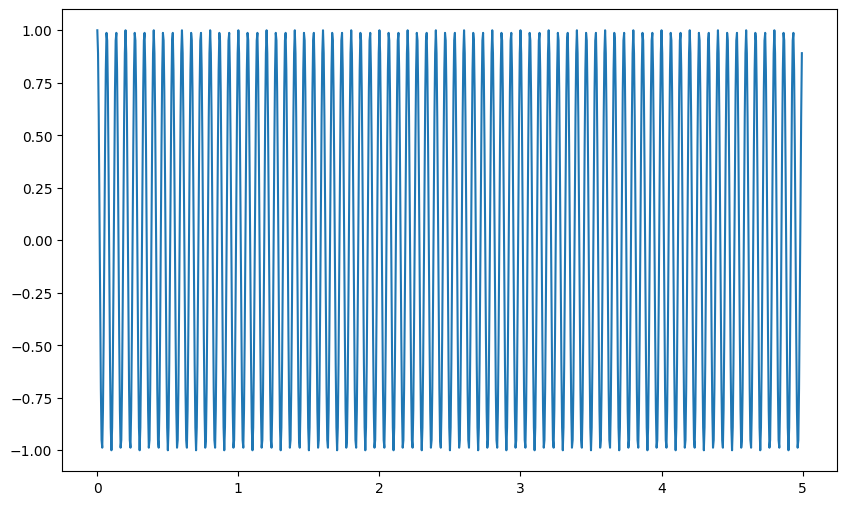

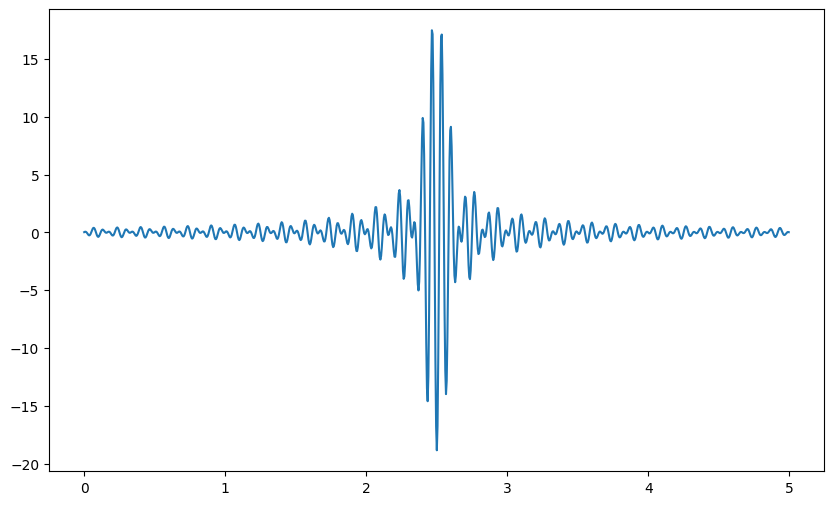

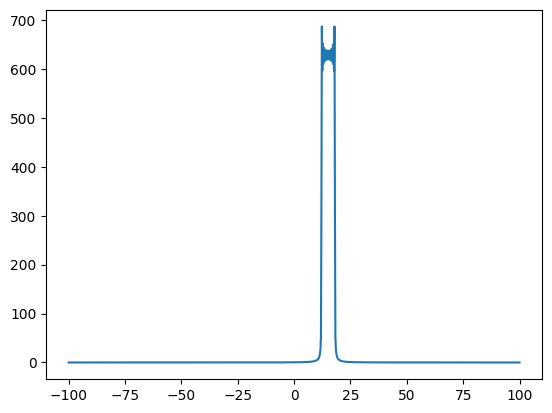

In [36]:
#3c
carrier1 = np.exp(1j * 2 * np.pi * 15 * t)

#3d
plt.figure(figsize=(10, 6))
plt.plot(t, carrier1.real)
plt.show()

#3e
modulated1 = asignal * carrier1

plt.figure(figsize=(10, 6))
plt.plot(t, modulated1.real)
plt.show()

#3f
MODULATED1 = np.fft.fft(modulated1)

#3g
plt.figure()
plt.plot(freqs, np.abs(np.fft.fftshift(MODULATED1)))
plt.show()

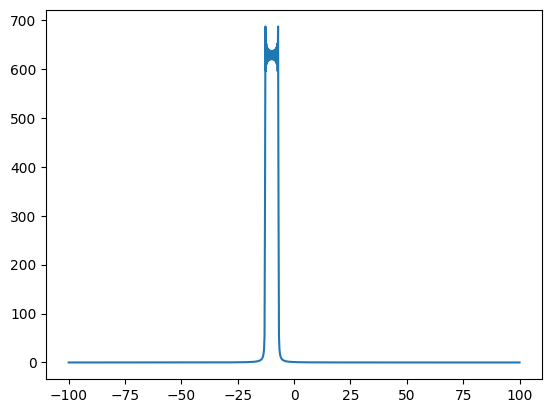

In [35]:
#3h
carrier2 = np.exp(1j * 2 * np.pi * -10 * t)
modulated2 = asignal * carrier2
MODULATED2 = np.fft.fft(modulated2)

plt.figure()
plt.plot(freqs, np.abs(np.fft.fftshift(MODULATED2)))
plt.show()

In [ ]:
#3i
 #When you modulate a signal, you shift its spectrum in the frequency domain.
 #For MODULATED1, the original spectrum of asignal is shifted up by 15 Hz, and for MODULATED2, it's shifted down by 10 Hz.
 #This shift affects where the spectrum is centered.